# Zestaw 10. Równania różniczkowe zwyczajne

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy.integrate
from math import tan, sin, pi, cos

## 1. Metoda Eulera i Rungego-Kutty

Zaimplementuj dwie metody rozwiazywania równań różniczkowych zwyczajnych:
- Eulera

In [54]:
def euler(f, u0, t0, x, steps=100):
    h = (x-t0)/steps
    u = u0
    
    t = t0
    
    for _ in range(steps):
        u += h*f(t, u)
        t += h
    
    return u

- Rungego-Kutty rzędu 4

In [55]:
def runge_kutta(f, u0, t0, x, steps=100):
    h = (x-t0)/steps
    u = u0
    
    t = t0
    for i in range(steps):
        k1 = h*f(t, u)
        k2 = h*f(t+h/2, u+k1/2)
        k3 = h*f(t+h/2, u+k2/2)
        k4 = h*f(t+h, u+k3)
        u += (k1 + 2*k2 + 2*k3 + k4)/6
        t += h
    
    return u

Opisz czym charakteryzują się obie metody.
TODO

#### test

* $u' = x$

In [56]:
f = lambda t, x:t
u = lambda x: x**2/2

x = 1
u0 = 0
t0 = 0

In [57]:
print('euler: ', euler(f, u0, t0, x))
print('runge kutta: ', runge_kutta(f, u0, t0, x))
print('wzór analityczny: ', u(x))
print('scipy: ', scipy.integrate.solve_ivp(f, (t0, x), [u0])['y'][0, -1])

euler:  0.4950000000000004
runge kutta:  0.5000000000000002
wzór analityczny:  0.5
scipy:  0.5000000000000001


* $u' = 2 + (u-x-1)^2 $

In [58]:
f = lambda t, x: 2 + (x-t-1)**2
u = lambda t: 1 + t + tan(t-1)

t0 = 1
u0 = 2
x = 1.5625

100 steps

In [59]:
print('euler: ', euler(f, u0, t0, x))
print('runge kutta: ', runge_kutta(f, u0, t0, x))
print('wzór analityczny: ', u(x))
print('scipy: ', scipy.integrate.solve_ivp(f, (t0, x), [u0])['y'][0, -1])

euler:  3.1916333906413565
runge kutta:  3.1929376738362407
wzór analityczny:  3.1929376738358846
scipy:  3.1929385148183353


5 steps

In [74]:
print('euler: ', euler(f, u0, t0, x, 5))
print('runge kutta: ', runge_kutta(f, u0, t0, x, 5))
print('wzór analityczny: ', u(x))
print('scipy: ', scipy.integrate.solve_ivp(f, (t0, x), [u0], min_step=abs(x-t0)/5)['y'][0, -1])

euler:  3.170468096693291
runge kutta:  3.1929374655231495
wzór analityczny:  3.1929376738358846
scipy:  3.1929385148183353


## 2. Wahadło matematyczne

<i> Wykorzystaj implementację z poprzedniego zadania do symulacji wahadła matematycznego wykorzystując równanie: </i>

<center>$\frac{d^2x}{dt^2} + \frac gl \sin{x} = 0$</center>

In [234]:
def runge_kutta(f, u0, t0, x, steps=10):
    h = (x-t0)/steps
    u = u0
    
    t = t0
    for i in range(steps):
        k1 = h*f(t, u)
        k2 = h*f(t+h/2, u+k1/2)
        k3 = h*f(t+h/2, u+k2/2)
        k4 = h*f(t+h, u+k3)
        u += (k1 + 2*k2 + 2*k3 + k4)/6
        t += h
    
    return u

In [431]:
def pendulum(angle, g=1, l=1, n=100):
    y = angle
    v = 0
    
    h = 0.1
    t = 0
    
    for i in range(n):
        y = runge_kutta(lambda t, x: v, y, t, t+h, 1) 
        v = runge_kutta(lambda t, x: -g/l*sin(y), v, t, t+h, 1)
        t += h
        yield(y)

#### animacja

In [428]:
def animate_pendulum(n=1000, angle=pi/4, g=1, l=1):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(-l, l)
    ax.set_ylim(-1, l)
    scat = ax.scatter([l*sin(angle)], [l-l*cos(angle)], color='slateblue', linewidth=10)
    line, = ax.plot([0, l*sin(angle)], [l, l-l*cos(angle)], color='pink', zorder=0)
    
    ys = list(pendulum(angle, g=g, l=l, n=n))
    
    def draw_pendulum(i):
        scat.set_offsets([l*sin(ys[i]), l-l*cos(ys[i])])
        line.set_xdata([0, l*sin(ys[i])])
        line.set_ydata([l, l-l*cos(ys[i])])
        
    return animation.FuncAnimation(fig, draw_pendulum, interval=10, frames=n)

<IPython.core.display.Javascript object>


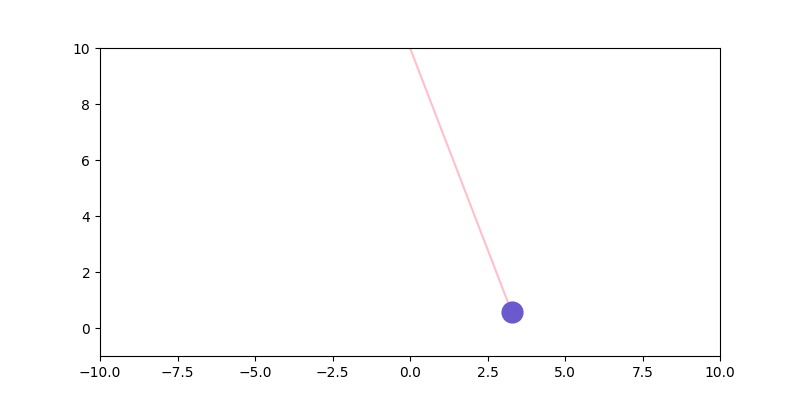

In [430]:
%matplotlib notebook
animated = animate_pendulum(angle=pi/8, g=10, l=10)
plt.draw()
plt.show()

## 3. Wahadło podwójne

## Wnioski

- 
- 

M. Hawryluk 23.05.2021